<a href="https://colab.research.google.com/github/vmtmxmf5/Python-Basics/blob/main/%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적


### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/drive/MyDrive/Data/xAPI-Edu-Data.csv')
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df_cat = df.drop(['raisedhands', 'VisITedResources','AnnouncementsView','Discussion'], axis=1)
for i in df_cat:
    print(f'{i} :', set(df_cat[i]), '\n')

gender : {'F', 'M'} 

NationalITy : {'Morocco', 'lebanon', 'Tunis', 'USA', 'SaudiArabia', 'Syria', 'Iran', 'Palestine', 'Iraq', 'venzuela', 'Lybia', 'KW', 'Jordan', 'Egypt'} 

PlaceofBirth : {'Morocco', 'lebanon', 'Tunis', 'USA', 'SaudiArabia', 'Syria', 'Iran', 'Palestine', 'Iraq', 'venzuela', 'Lybia', 'KuwaIT', 'Jordan', 'Egypt'} 

StageID : {'lowerlevel', 'MiddleSchool', 'HighSchool'} 

GradeID : {'G-04', 'G-02', 'G-05', 'G-06', 'G-08', 'G-07', 'G-11', 'G-12', 'G-10', 'G-09'} 

SectionID : {'B', 'A', 'C'} 

Topic : {'Spanish', 'Science', 'History', 'IT', 'Chemistry', 'Geology', 'Quran', 'French', 'Biology', 'Arabic', 'Math', 'English'} 

Semester : {'F', 'S'} 

Relation : {'Father', 'Mum'} 

ParentAnsweringSurvey : {'No', 'Yes'} 

ParentschoolSatisfaction : {'Bad', 'Good'} 

StudentAbsenceDays : {'Under-7', 'Above-7'} 

Class : {'L', 'H', 'M'} 



### 문제 5. 수치형 데이터의 히스토그램 그리기


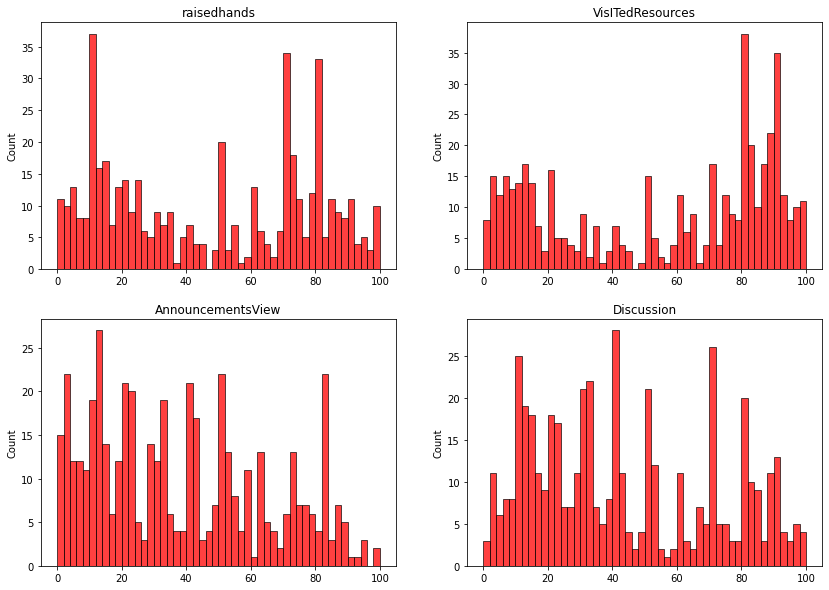

In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax = axes.ravel()
df_con_name = ['raisedhands', 'VisITedResources','AnnouncementsView','Discussion']
df_con = df[['raisedhands', 'VisITedResources','AnnouncementsView','Discussion']].to_numpy()

for i in range(4):
    _, bins = np.histogram(df_con[:, 0], bins=50)
    sns.histplot(data=df_con, x=df_con[:, i], bins=bins, ax=ax[i], color='red')
    ax[i].set_title(df_con_name[i])

In [ ]:
## 직접 그리기 1
# import matplotlib.gridspec as gridspec

# fig = plt.figure()
# spec = fig.add_gridspec(ncols=3, nrows=2)
# fig.add_subplot(spec[0, 0])
# sns.jointplot(data=df_con, x=df_con['raisedhands'], y=df_con['VisITedResources'], kind='scatter')
# fig.add_subplot(spec[0, 1])
# sns.jointplot(data=df_con, x=df_con['AnnouncementsView'],  y=df_con['VisITedResources'], kind='scatter')
# fig.add_subplot(spec[0, 2])
# sns.jointplot(data=df_con, x=df_con['Discussion'],  y=df_con['VisITedResources'], kind='scatter')

## for문
# columns = ['raisedhands', 'VisITedResources','AnnouncementsView','Discussion']
# for index in range(4):
#     for j in range(index+1, 4):
#         fig.add_subplot(spec[index, j])
#         g = sns.jointplot(data=df_con, x=columns[index], y=columns[j], kind='scatter')

## 직접 그리기 2
# for J in [JG1, JG2]:
#     for A in J.fig.axes:
#         f._axstack.add(f._make_key(A), A)

# f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
# f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
# f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
# f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
# f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
# f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])

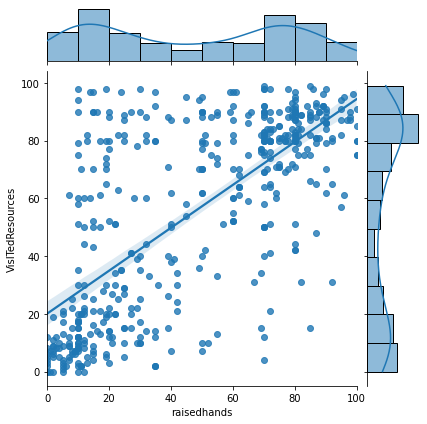

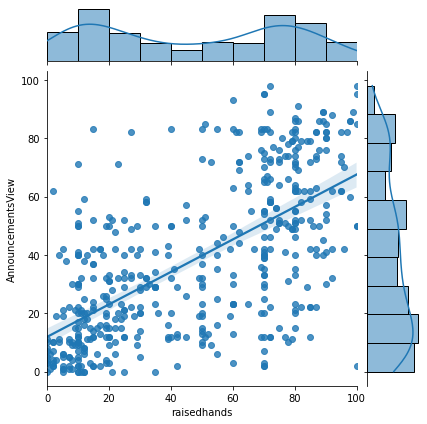

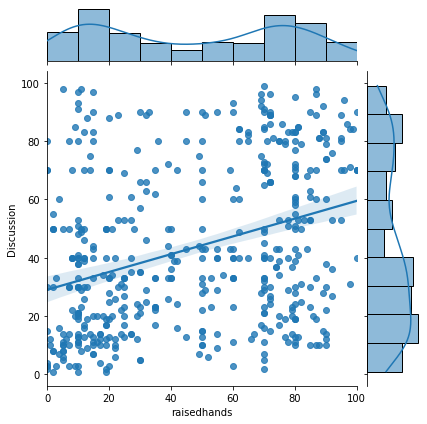

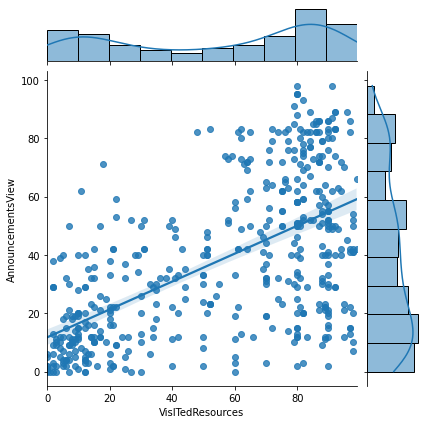

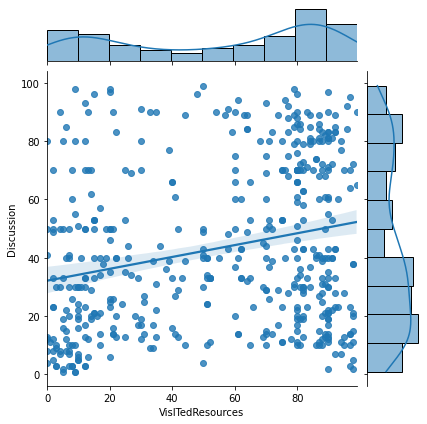

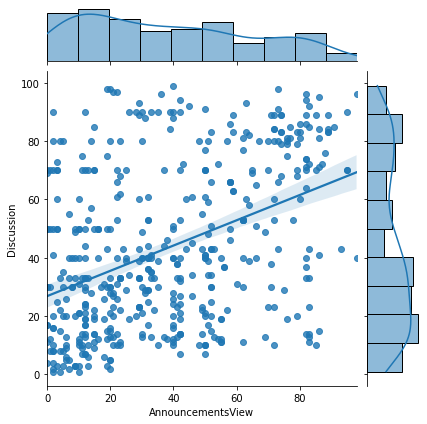

In [ ]:
sns.jointplot(data=df_con, x='raisedhands', y='VisITedResources', kind='reg')
sns.jointplot(data=df_con, x='raisedhands', y='AnnouncementsView', kind='reg')
sns.jointplot(data=df_con, x='raisedhands', y='Discussion', kind='reg')
sns.jointplot(data=df_con, x='VisITedResources', y='AnnouncementsView', kind='reg')
sns.jointplot(data=df_con, x='VisITedResources', y='Discussion', kind='reg')
sns.jointplot(data=df_con, x='AnnouncementsView', y='Discussion', kind='reg')
plt.show() 

Discussion, raisedhands

Discussion, Visited Resource

Visited resource, announcement view

raised hands,  announcement view

- class 성적이 Low한 경우 feature간에 양의 상관관계를 띠고 있음
- 

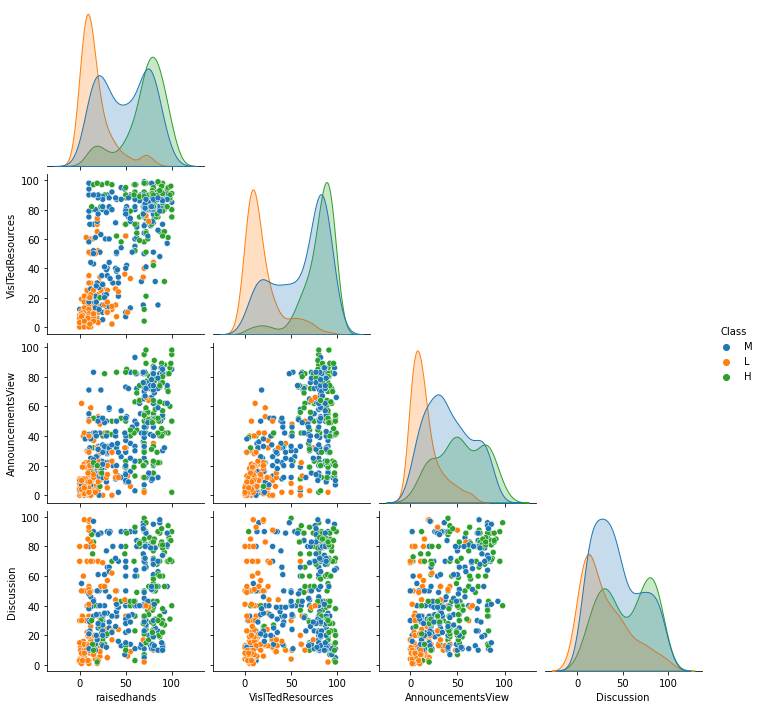

In [ ]:
df_con = df[['raisedhands', 'VisITedResources','AnnouncementsView','Discussion', 'Class']]
sns.pairplot(df_con, corner=True, hue='Class')
plt.show()

### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


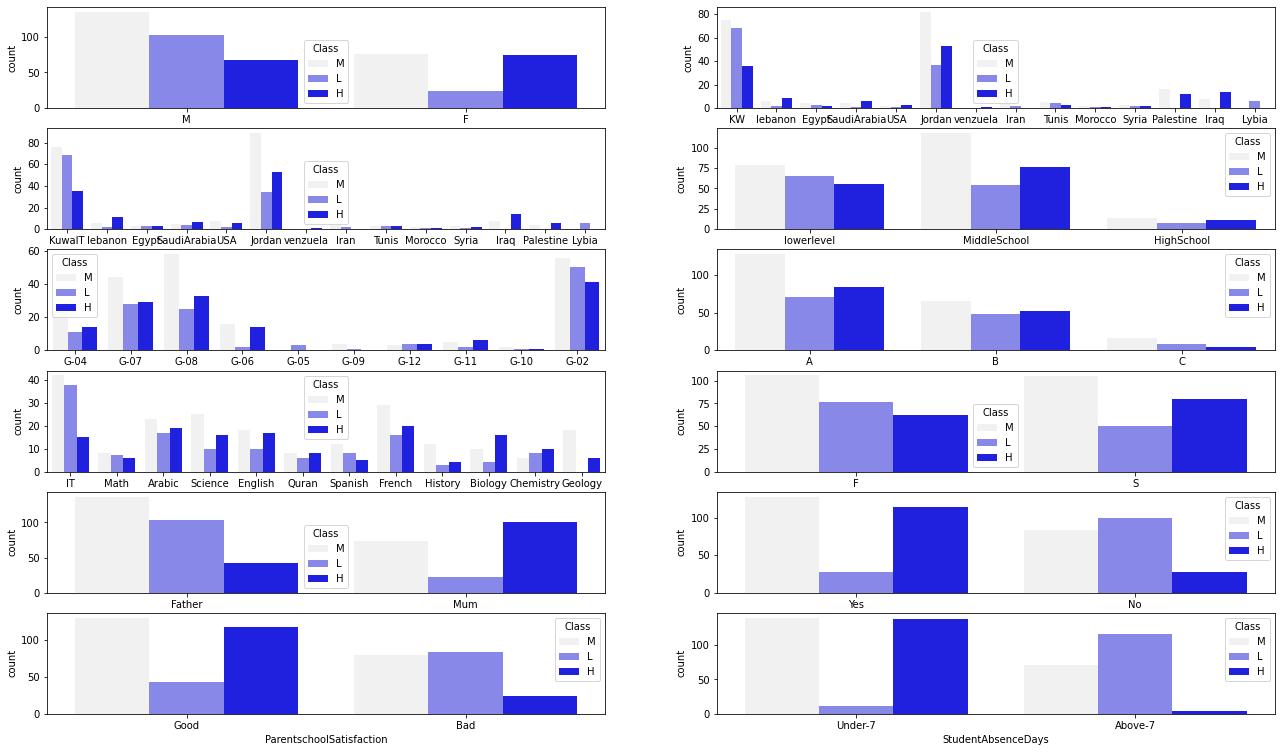

In [ ]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인

fig, axes = plt.subplots(6, 2, figsize=(22, 13))
ax = axes.ravel()


for i in range(12):
    sns.countplot(x=df_cat.iloc[:,i], data=df_cat, hue=df_cat.iloc[:, 12], ax=ax[i], color='blue')

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [ ]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용

my_map = {'L':-1, 'M':0, 'H':1}

df['Class_value'] = df['Class'].map(my_map)
df['Class_value'].value_counts()

 0    211
 1    142
-1    127
Name: Class_value, dtype: int64

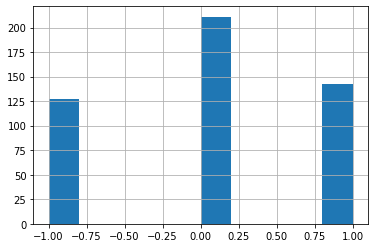

In [ ]:
df['Class_value'].hist()
plt.show()

In [ ]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

NameError: ignored

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 9. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X = df.drop(['Class','Class_value'], axis=1) 
y = df['Class_value']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

num_attr = ['raisedhands', 'VisITedResources','AnnouncementsView','Discussion']

cat_attr = list(X_train)
for i in num_attr:
    cat_attr.remove(i)

num_pipe = Pipeline([
    ('num', MinMaxScaler())
])

cat_pipe = Pipeline([
    ('cat', OneHotEncoder())
])

full_pipe = ColumnTransformer([
    ('n', num_pipe, num_attr),
    ('c', cat_pipe, cat_attr)                               
])

In [ ]:
full_pipe.fit(X_train)
X_train_scaled = full_pipe.transform(X_train)
X_test_scaled = full_pipe.transform(X_test)

Feature 선택을 위해 RFE를 사용했으나 오히려 스코어가 0.05 낮아졌다

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# select = RFE(
#     RandomForestClassifier(),
#     n_features_to_select=35
# )
# select.fit(X_train_scaled, y_train)

# X_train_scaled = select.transform(X_train_scaled)
# X_test_scaled = select.transform(X_test_scaled)

## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)
lr_pred = model_lr.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 문제 11. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = classification_report(y_test, lr_pred)

print(pred)

              precision    recall  f1-score   support

          -1       0.85      0.85      0.85        34
           0       0.78      0.81      0.80        58
           1       0.77      0.71      0.74        28

    accuracy                           0.80       120
   macro avg       0.80      0.79      0.80       120
weighted avg       0.80      0.80      0.80       120



### 문제 12. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier(n_jobs=-1)
model_xgb.fit(X_train_scaled, y_train)
xgb_pred = model_xgb.predict(X_test_scaled)

### 문제 13. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = classification_report(y_test, xgb_pred)
print(pred)

              precision    recall  f1-score   support

          -1       0.84      0.91      0.87        34
           0       0.79      0.79      0.79        58
           1       0.76      0.68      0.72        28

    accuracy                           0.80       120
   macro avg       0.80      0.79      0.79       120
weighted avg       0.80      0.80      0.80       120



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
model_lr.coef_.shape
model_lr.score(X_test_scaled, y_test)

0.8

### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기

model_xgb.score(X_test_scaled, y_test)


0.8

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier().fit(X_train_scaled, y_train)
svm = SVC(C=5).fit(X_train_scaled, y_train)

print(rf.score(X_test_scaled, y_test), svm.score(X_test_scaled, y_test))

0.825 0.8


In [ ]:
voting = VotingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('xgb', model_xgb)]
)

voting.fit(X_train_scaled, y_train)
voting.score(X_test_scaled, y_test)



0.8